## ***Trabalho de Conclusão de Curso - Recurrent Neural Network - LSTM***

**Aluno: 7003 - Maximiliano Augusto Rocha Júnior.**

**Objetivo:** Demonstrar o uso de Redes Neurais Recorrentes com LSTM para predição de quantidades de caixas vendidas por semana de um produto comum de mercado. O "comprador" de posse desta informação com antecedência pode efetuar as compras por semana, evitando a falta de estoque e excesso no armazém WMS da empresa e melhorando o fluxo de caixa.



**Produto: Lamen Nissin Galinha Caipira**

**Versão 1.01 - 25/08/2021**

**Mount do drive pessoal**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
workdir_path = '/content/drive/My Drive/TCC_GitHub/'  # Inserir o local da pasta onde estão os arquivos de entrada (treino e teste)
os.chdir(workdir_path)

In [ ]:
#Verificar se a pasta mapeada contem os arquivos abaixo
!ls

LamenLSTM.ipynb  lamen_mes_teste.csv		testes
lamen_mes.csv	 predictions_training_test.svg


## Parte 1 - Preprocessamento de Dados

# Importar as bibliotecas Python

In [ ]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
#from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# **Importar base de dados .CSV**

In [ ]:
dataset_train = read_csv('lamen_mes.csv')
training_set = dataset_train.iloc[:, 1:2].values  #Todas as linhas, Coluna 0 até 1, 
#print(training_set) #Confirma DataSet preenchido
dataset_train.head()

,MES,CAIXAS
0,2011-01,4458
1,2011-02,4276
2,2011-03,4680
3,2011-04,4578
4,2011-05,4979


# **Gráfico da série temporal**

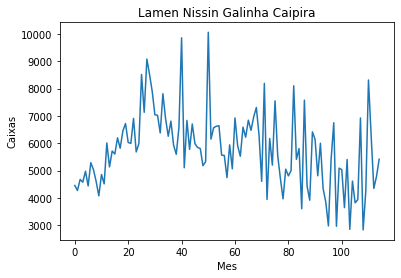

In [ ]:
plt.plot(training_set)
plt.xlabel("Mes")
plt.ylabel("Caixas")
plt.title("Lamen Nissin Galinha Caipira")
plt.show()

# **Normalizar dados**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc =  MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set) 

## Criar a estrutura de dados com janela 10 e output 1


In [ ]:
import numpy as np

window = 5 #padrao 10
trainSize = len(training_set_scaled)
X_train = []
y_train = []
for i in range(window, trainSize):
    X_train.append(training_set_scaled[i-window:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

## Reshaping

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# **### Parte 2 - Construção da RNN**

# Bibliotecas necessárias - Keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

#Construção da Rede Neural Recorrente com Long Short Term Memory -> **RNN LSTM**

In [ ]:
# Iniciar RNN
regressor = Sequential()

# Adicionar a primeira camada LSTM e Dropout 
regressor.add(LSTM(units = 150, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
 
# Adicionar a segunda camada LSTM e Dropout
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))
 
# Adicionar a terceira camada LSTM e Dropout
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
 
# camada de saída
regressor.add(Dense(units = 1))
 
# Compilar a rede
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['acc'])  

# Visualizar a rede
regressor.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_42 (LSTM)               (None, 5, 150)            91200     
_________________________________________________________________
dropout_42 (Dropout)         (None, 5, 150)            0         
_________________________________________________________________
lstm_43 (LSTM)               (None, 5, 100)            100400    
_________________________________________________________________
dropout_43 (Dropout)         (None, 5, 100)            0         
_________________________________________________________________
lstm_44 (LSTM)               (None, 50)                30200     
_________________________________________________________________
dropout_44 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)               

## **Treinamento**

In [ ]:
# 250 Épocas = mape 16.22%
# 280 Épocas = mape 16.83% > 2011
# 300 Épocas = mape 15.96% -> variando aproximadamente 16% com dados mensais a partir de 2011
# 350 Épocas = mape 16.30%
# 450 Épocas = mape 18 %
# 500 Épocas = mape 16,65%
# 700 Épocas = mape 16,52%
# 750 Épocas = mape 16.95%
regressor.fit(X_train, y_train, epochs = 300, batch_size = 32)

Epoch 1/300
4/4 [==============================] - 6s 23ms/step - loss: 0.1817 - acc: 0.0091
Epoch 2/300
4/4 [==============================] - 0s 20ms/step - loss: 0.0885 - acc: 0.0091
Epoch 3/300
4/4 [==============================] - 0s 25ms/step - loss: 0.0434 - acc: 0.0091
Epoch 4/300
4/4 [==============================] - 0s 23ms/step - loss: 0.0474 - acc: 0.0182
Epoch 5/300
4/4 [==============================] - 0s 21ms/step - loss: 0.0320 - acc: 0.0091
Epoch 6/300
4/4 [==============================] - 0s 20ms/step - loss: 0.0371 - acc: 0.0091
Epoch 7/300
4/4 [==============================] - 0s 20ms/step - loss: 0.0351 - acc: 0.0091
Epoch 8/300
4/4 [==============================] - 0s 22ms/step - loss: 0.0357 - acc: 0.0091
Epoch 9/300
4/4 [==============================] - 0s 19ms/step - loss: 0.0317 - acc: 0.0091
Epoch 10/300
4/4 [==============================] - 0s 21ms/step - loss: 0.0325 - acc: 0.0091
Epoch 11/300
4/4 [==============================] - 0s 20ms/step - lo

## **Parte 3 - Fazer as previsões e analisar os resultados**

##Base de teste

In [ ]:
dataset_test = pd.read_csv('lamen_mes_teste.csv')
real_venda = dataset_test.iloc[:, 1:2].values
print(dataset_test) 

        MES  CAIXAS
0   2020-08    5383
1   2020-09    4629
2   2020-10    6659
3   2020-11    5626
4   2020-12    8440
5   2021-01    6709
6   2021-02    5261
7   2021-03    7895
8   2021-04    7868
9   2021-05    9088
10  2021-06    7646
11  2021-07    5652
12  2021-08    6748


##Construir a estrutura para teste

In [ ]:
dataset_total = pd.concat((dataset_train.iloc[:,1], dataset_test.iloc[:,1]), axis = 0)
testLength = len(dataset_test)
inputs = dataset_total[len(dataset_total) - testLength - window:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(window, testLength + window): 
    X_test.append(inputs[i-window:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


##Fazer as previsões

In [ ]:
predicted_venda = regressor.predict(X_test)
predicted_venda = sc.inverse_transform(predicted_venda)
print(predicted_venda)

[[5441.18  ]
 [5447.644 ]
 [5372.1553]
 [5622.722 ]
 [5778.9204]
 [6077.919 ]
 [6545.1553]
 [6736.007 ]
 [6670.316 ]
 [6470.635 ]
 [7096.033 ]
 [7532.8657]
 [7071.536 ]]


## **Visualizar os resultados de treino e teste**

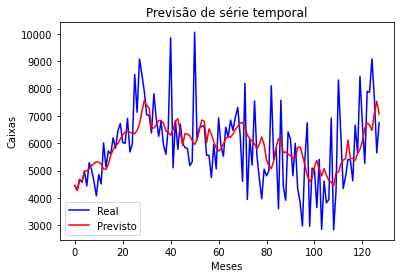

In [ ]:
allTargetData = np.vstack((training_set, real_venda))
training_predicted_venda = regressor.predict(X_train)
training_predicted_venda = sc.inverse_transform(training_predicted_venda)
allForecastedData = np.vstack((training_set[0:window], training_predicted_venda, predicted_venda))

plt.plot(allTargetData, color = 'blue', label = 'Real')
plt.plot(allForecastedData, color = 'red', label = 'Previsto')

plt.title('Previsão de série temporal')
plt.xlabel('Meses')
plt.ylabel('Caixas')
plt.legend()
plt.savefig('predictions_training_test.svg')
plt.show()

## **Parte 4 - Métricas de avaliação**

**RMSE - Root mean Squared Error**

In [ ]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_venda, predicted_venda))
print('RMSE: ', rmse)

RMSE:  1387.6187073861875


**MAE - Mean Absolute Error**

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(real_venda, predicted_venda)
print('MAE: ',mae)

MAE:  1113.2056790865386


**MSE - Mean Squared Error**

In [ ]:
mse = mean_squared_error(real_venda, predicted_venda)
print('MSE: ',mse)

MSE:  1925485.677088114


**MAPE — Mean Absolute Percentage Error**

In [ ]:
mape = np.mean(np.abs((real_venda - predicted_venda) / real_venda)) * 100
print('MAPE: ',mape) ## Melhor percentual alcançado 15,95% = 300 com epocas 10 windows, valores 2011 em diante, teste 12 ultimos meses

MAPE:  15.958595921192039
